In [1]:
import os
import pandas as pd
from pathlib import Path
import seaborn as sns

In [2]:
sns.set_style("ticks")

# Smallest context:
sns.set_context("paper")
base_dir = Path().cwd()


In [3]:
# num_rows = 115
# years = list(range(5, 5 + num_rows, 5))
# data_preproc = pd.DataFrame({
#     'Seconds': years, 
#     **container_nginx_memory_4G_periods
# ,}
#     )
# # Nginx Container Memory usage on each period run during 120 second 4G memory stress
# sns.lineplot(x='Seconds', y='Memory Usage (GB)', hue='Period', palette="tab10",
#              data=pd.melt(data_preproc, ['Seconds']).rename(columns={"variable": "Period", "value": "Memory Usage (GB)"}))
# pd.melt(data_preproc, ['Seconds']).rename(columns={"variable": "Period", "value": "Memory Usage (GB)"})["Memory Usage (GB)"].mean()

In [4]:
### File paths
container_data = base_dir / "experiments" / "container"
vm_data = base_dir / "experiments" / "vm"
ec2_data = base_dir / "experiments" / "ec2"

def get_files(root_dir:Path, parent_folder:str, folder_name: str) -> Path:
    path = root_dir / parent_folder / folder_name / "stats" / "csv"
    return {x.stem:x for x in path.iterdir()}

container_nginx_memory_data = get_files(container_data, "nginx", "memory")
container_apache_memory_data = get_files(container_data, "apache", "memory")


vm_nginx_memory_data = get_files(vm_data, "nginx", "memory")
vm_apache_memory_data = get_files(vm_data, "apache", "memory")


ec2_nginx_memory_data = get_files(ec2_data, "nginx", "memory")
ec2_apache_memory_data = get_files(ec2_data, "apache", "memory")

# Container 

## Nginx Memory Analysis

### Nginx Memory Analysis 4G

In [5]:
# Nginx memory 4G analysis

container_df_nginx_memory_4G_1 = pd.read_csv(container_nginx_memory_data["vmstats-4G-1"])
container_df_nginx_memory_4G_2 = pd.read_csv(container_nginx_memory_data["vmstats-4G-2"])
container_df_nginx_memory_4G_3= pd.read_csv(container_nginx_memory_data["vmstats-4G-3"])


# Remove first and last point as they are not representative
n=1
container_df_nginx_memory_4G_1.drop(container_df_nginx_memory_4G_1.tail(n).index,inplace=True)
container_df_nginx_memory_4G_1.drop(container_df_nginx_memory_4G_1.head(n).index,inplace=True)

container_df_nginx_memory_4G_2.drop(container_df_nginx_memory_4G_2.tail(n).index,inplace=True)
container_df_nginx_memory_4G_2.drop(container_df_nginx_memory_4G_2.head(n).index,inplace=True)

container_df_nginx_memory_4G_3.drop(container_df_nginx_memory_4G_3.tail(n).index,inplace=True)
container_df_nginx_memory_4G_3.drop(container_df_nginx_memory_4G_3.head(n).index,inplace=True)

<AxesSubplot:>

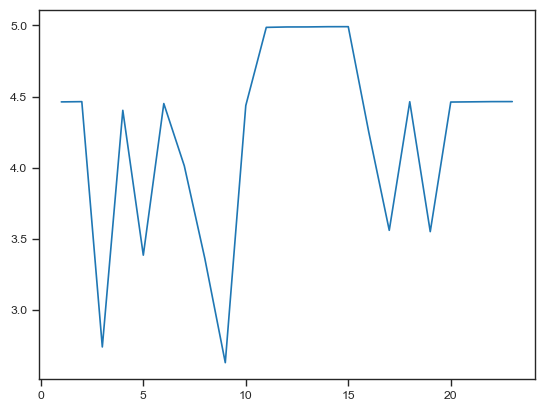

In [6]:
container_nginx_memory_4G_periods ={'Period 1': container_df_nginx_memory_4G_1["K used memory"] /1_000_000,
    'Period 2': container_df_nginx_memory_4G_2["K used memory"] /1_000_000,
    'Period 3': container_df_nginx_memory_4G_3["K used memory"] /1_000_000}
container_nginx_memory_4G_total_average = pd.DataFrame(container_nginx_memory_4G_periods).mean(axis=1)
container_nginx_memory_4G_total_average.plot()

In [7]:
container_nginx_memory_4G_average = pd.DataFrame(pd.DataFrame(container_nginx_memory_4G_periods).mean()).transpose()
container_nginx_memory_4G_average

,Period 1,Period 2,Period 3
0,4.255609,4.055218,4.337545


###  Nginx Memory Analysis 8G

In [8]:
# Nginx memory 8G analysis

container_df_nginx_memory_8G_1 = pd.read_csv(container_nginx_memory_data["vmstats-8G-1"])
container_df_nginx_memory_8G_2 = pd.read_csv(container_nginx_memory_data["vmstats-8G-2"])
container_df_nginx_memory_8G_3= pd.read_csv(container_nginx_memory_data["vmstats-8G-3"])


# Remove first and last point as they are not representative
n=1
container_df_nginx_memory_8G_1.drop(container_df_nginx_memory_8G_1.tail(2).index,inplace=True)
container_df_nginx_memory_8G_1.drop(container_df_nginx_memory_8G_1.head(n).index,inplace=True)

container_df_nginx_memory_8G_2.drop(container_df_nginx_memory_8G_2.tail(n).index,inplace=True)
container_df_nginx_memory_8G_2.drop(container_df_nginx_memory_8G_2.head(n).index,inplace=True)

container_df_nginx_memory_8G_3.drop(container_df_nginx_memory_8G_3.tail(n).index,inplace=True)
container_df_nginx_memory_8G_3.drop(container_df_nginx_memory_8G_3.head(n).index,inplace=True)


<AxesSubplot:>

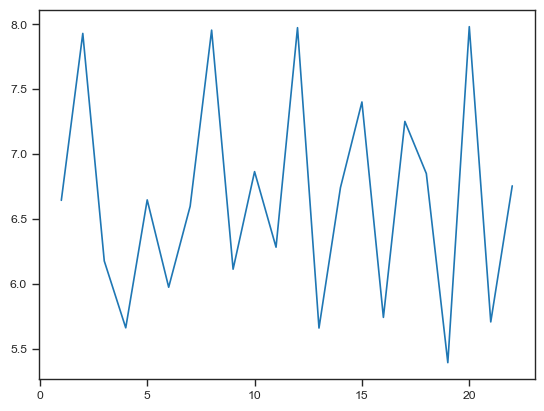

In [9]:
container_nginx_memory_8G_periods ={'Period 1': container_df_nginx_memory_8G_1["K used memory"] /1_000_000,
    'Period 2': container_df_nginx_memory_8G_2["K used memory"] /1_000_000,
    'Period 3': container_df_nginx_memory_8G_3["K used memory"] /1_000_000}
container_nginx_memory_8G_total_average = pd.DataFrame(container_nginx_memory_8G_periods).mean(axis=1)
container_nginx_memory_8G_total_average.plot()


In [10]:
container_nginx_memory_8G_average = pd.DataFrame(pd.DataFrame(container_nginx_memory_8G_periods).mean()).transpose()
container_nginx_memory_8G_average

,Period 1,Period 2,Period 3
0,6.522674,6.357888,7.070824


## Apache memory analysis

### Apache Memory Analysis 4G

In [11]:
# Apache memory 4G analysis

container_df_apache_memory_4G_1 = pd.read_csv(container_apache_memory_data["vmstats-4G-1"])
container_df_apache_memory_4G_2 = pd.read_csv(container_apache_memory_data["vmstats-4G-2"])
container_df_apache_memory_4G_3= pd.read_csv(container_apache_memory_data["vmstats-4G-3"])


# Remove first and last point as they are not representative
n=1
container_df_apache_memory_4G_1.drop(container_df_apache_memory_4G_1.tail(n).index,inplace=True)
container_df_apache_memory_4G_1.drop(container_df_apache_memory_4G_1.head(n).index,inplace=True)

container_df_apache_memory_4G_2.drop(container_df_apache_memory_4G_2.tail(n).index,inplace=True)
container_df_apache_memory_4G_2.drop(container_df_apache_memory_4G_2.head(n).index,inplace=True)

container_df_apache_memory_4G_3.drop(container_df_apache_memory_4G_3.tail(n).index,inplace=True)
container_df_apache_memory_4G_3.drop(container_df_apache_memory_4G_3.head(n).index,inplace=True)


<AxesSubplot:>

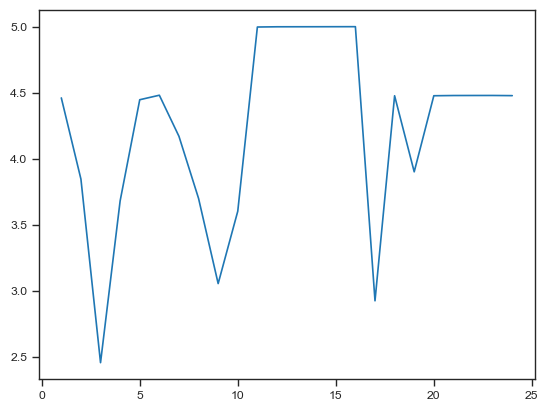

In [12]:
container_apache_memory_4G_periods ={'Period 1': container_df_apache_memory_4G_1["K used memory"] /1_000_000,
    'Period 2': container_df_apache_memory_4G_2["K used memory"] /1_000_000,
    'Period 3': container_df_apache_memory_4G_3["K used memory"] /1_000_000}
container_apache_memory_4G_total_average = pd.DataFrame(container_apache_memory_4G_periods).mean(axis=1)
container_apache_memory_4G_total_average.plot()


In [13]:
container_apache_memory_4G_average = pd.DataFrame(pd.DataFrame(container_apache_memory_4G_periods).mean()).transpose()
container_apache_memory_4G_average

,Period 1,Period 2,Period 3
0,4.185479,4.411228,4.093972


### Apache Memory Analysis 8G

In [14]:
# Apache memory 8G analysis

container_df_apache_memory_8G_1 = pd.read_csv(container_apache_memory_data["vmstats-8G-1"])
container_df_apache_memory_8G_2 = pd.read_csv(container_apache_memory_data["vmstats-8G-2"])
container_df_apache_memory_8G_3= pd.read_csv(container_apache_memory_data["vmstats-8G-3"])


# Remove first and last point as they are not representative
n=1
container_df_apache_memory_8G_1.drop(container_df_apache_memory_8G_1.tail(n).index,inplace=True)
container_df_apache_memory_8G_1.drop(container_df_apache_memory_8G_1.head(n).index,inplace=True)

container_df_apache_memory_8G_2.drop(container_df_apache_memory_8G_2.tail(n).index,inplace=True)
container_df_apache_memory_8G_2.drop(container_df_apache_memory_8G_2.head(n).index,inplace=True)

container_df_apache_memory_8G_3.drop(container_df_apache_memory_8G_3.tail(n).index,inplace=True)
container_df_apache_memory_8G_3.drop(container_df_apache_memory_8G_3.head(n).index,inplace=True)


<AxesSubplot:>

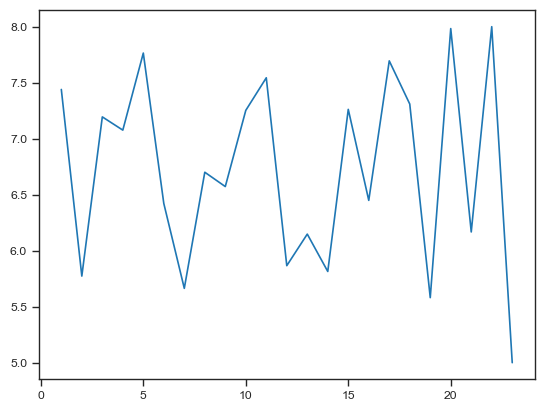

In [15]:
container_apache_memory_8G_periods ={'Period 1': container_df_apache_memory_8G_1["K used memory"] /1_000_000,
    'Period 2': container_df_apache_memory_8G_2["K used memory"] /1_000_000,
    'Period 3': container_df_apache_memory_8G_3["K used memory"] /1_000_000}
container_apache_memory_8G_total_average = pd.DataFrame(container_apache_memory_8G_periods).mean(axis=1)
container_apache_memory_8G_total_average.plot()


In [16]:
container_apache_memory_8G_average = pd.DataFrame(pd.DataFrame(container_apache_memory_8G_periods).mean()).transpose()
container_apache_memory_8G_average

,Period 1,Period 2,Period 3
0,6.630269,6.894152,6.767213


# VM

## Nginx Memory Analysis

### Nginx Memory Analysis 4G

In [17]:
# Nginx memory 4G analysis

vm_df_nginx_memory_4G_1 = pd.read_csv(vm_nginx_memory_data["vmstats-4G-1"])
vm_df_nginx_memory_4G_2 = pd.read_csv(vm_nginx_memory_data["vmstats-4G-2"])
vm_df_nginx_memory_4G_3= pd.read_csv(vm_nginx_memory_data["vmstats-4G-3"])


# Remove first and last point as they are not representative
n=1
vm_df_nginx_memory_4G_1.drop(vm_df_nginx_memory_4G_1.tail(n).index,inplace=True)
vm_df_nginx_memory_4G_1.drop(vm_df_nginx_memory_4G_1.head(n).index,inplace=True)

vm_df_nginx_memory_4G_2.drop(vm_df_nginx_memory_4G_2.tail(n).index,inplace=True)
vm_df_nginx_memory_4G_2.drop(vm_df_nginx_memory_4G_2.head(n).index,inplace=True)

vm_df_nginx_memory_4G_3.drop(vm_df_nginx_memory_4G_3.tail(n).index,inplace=True)
vm_df_nginx_memory_4G_3.drop(vm_df_nginx_memory_4G_3.head(n).index,inplace=True)


<AxesSubplot:>

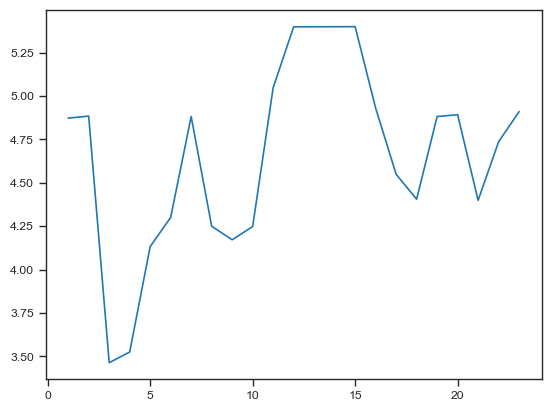

In [18]:
vm_nginx_memory_4G_periods ={'Period 1': vm_df_nginx_memory_4G_1["K used memory"] /1_000_000,
    'Period 2': vm_df_nginx_memory_4G_2["K used memory"] /1_000_000,
    'Period 3': vm_df_nginx_memory_4G_3["K used memory"] /1_000_000}
vm_nginx_memory_4G_total_average = pd.DataFrame(vm_nginx_memory_4G_periods).mean(axis=1)
vm_nginx_memory_4G_total_average.plot()

In [20]:
vm_nginx_memory_4G_average = pd.DataFrame(pd.DataFrame(vm_nginx_memory_4G_periods).mean()).transpose()
vm_nginx_memory_4G_average

,Period 1,Period 2,Period 3
0,4.847328,4.373328,4.746033


### Nginx Memory Analysis 8G

In [21]:
# Nginx memory 4G analysis

vm_df_nginx_memory_8G_1 = pd.read_csv(vm_nginx_memory_data["vmstats-8G-1"])
vm_df_nginx_memory_8G_2 = pd.read_csv(vm_nginx_memory_data["vmstats-8G-2"])
vm_df_nginx_memory_8G_3= pd.read_csv(vm_nginx_memory_data["vmstats-8G-3"])


# Remove first and last point as they are not representative
n=1
vm_df_nginx_memory_8G_1.drop(vm_df_nginx_memory_8G_1.tail(n).index,inplace=True)
vm_df_nginx_memory_8G_1.drop(vm_df_nginx_memory_8G_1.head(n).index,inplace=True)

vm_df_nginx_memory_8G_2.drop(vm_df_nginx_memory_8G_2.tail(n).index,inplace=True)
vm_df_nginx_memory_8G_2.drop(vm_df_nginx_memory_8G_2.head(n).index,inplace=True)

vm_df_nginx_memory_8G_3.drop(vm_df_nginx_memory_8G_3.tail(n).index,inplace=True)
vm_df_nginx_memory_8G_3.drop(vm_df_nginx_memory_8G_3.head(n).index,inplace=True)


<AxesSubplot:>

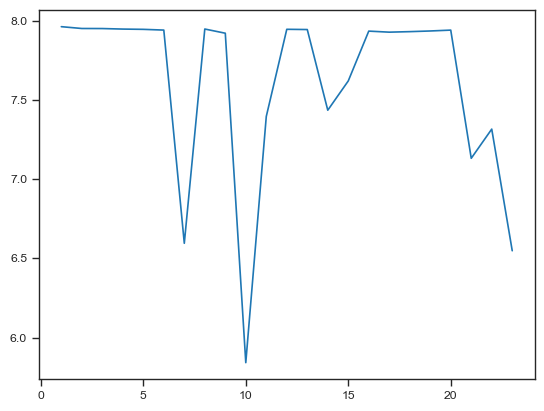

In [22]:
vm_nginx_memory_8G_periods ={'Period 1': vm_df_nginx_memory_8G_1["K used memory"] /1_000_000,
    'Period 2': vm_df_nginx_memory_8G_2["K used memory"] /1_000_000,
    'Period 3': vm_df_nginx_memory_8G_3["K used memory"] /1_000_000}
vm_nginx_memory_8G_total_average = pd.DataFrame(vm_nginx_memory_8G_periods).mean(axis=1)
vm_nginx_memory_8G_total_average.plot()

In [23]:
vm_nginx_memory_8G_average = pd.DataFrame(pd.DataFrame(vm_nginx_memory_8G_periods).mean()).transpose()
vm_nginx_memory_8G_average

,Period 1,Period 2,Period 3
0,7.946916,7.59007,7.288305


## Apache Memory Analysis

### Apache Memory Analysis 4G

In [24]:
# apache memory 4G analysis

vm_df_apache_memory_4G_1 = pd.read_csv(vm_apache_memory_data["vmstats-4G-1"])
vm_df_apache_memory_4G_2 = pd.read_csv(vm_apache_memory_data["vmstats-4G-2"])
vm_df_apache_memory_4G_3= pd.read_csv(vm_apache_memory_data["vmstats-4G-3"])


# Remove first and last point as they are not representative
n=1
vm_df_apache_memory_4G_1.drop(vm_df_apache_memory_4G_1.tail(n).index,inplace=True)
vm_df_apache_memory_4G_1.drop(vm_df_apache_memory_4G_1.head(n).index,inplace=True)

vm_df_apache_memory_4G_2.drop(vm_df_apache_memory_4G_2.tail(n).index,inplace=True)
vm_df_apache_memory_4G_2.drop(vm_df_apache_memory_4G_2.head(n).index,inplace=True)

vm_df_apache_memory_4G_3.drop(vm_df_apache_memory_4G_3.tail(n).index,inplace=True)
vm_df_apache_memory_4G_3.drop(vm_df_apache_memory_4G_3.head(n).index,inplace=True)


<AxesSubplot:>

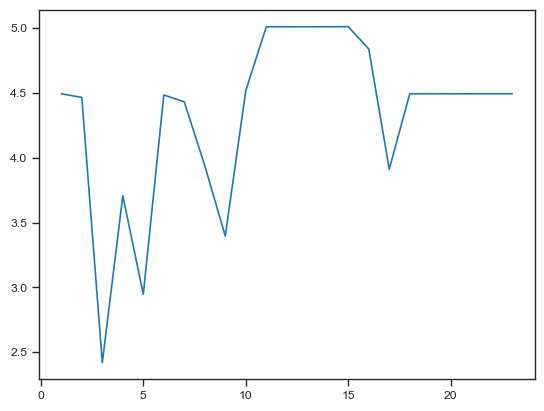

In [25]:
vm_apache_memory_4G_periods ={'Period 1': vm_df_apache_memory_4G_1["K used memory"] /1_000_000,
    'Period 2': vm_df_apache_memory_4G_2["K used memory"] /1_000_000,
    'Period 3': vm_df_apache_memory_4G_3["K used memory"] /1_000_000}
vm_apache_memory_4G_total_average = pd.DataFrame(vm_apache_memory_4G_periods).mean(axis=1)
vm_apache_memory_4G_total_average.plot()

In [26]:
vm_apache_memory_4G_average = pd.DataFrame(pd.DataFrame(vm_apache_memory_4G_periods).mean()).transpose()
vm_apache_memory_4G_average

,Period 1,Period 2,Period 3
0,4.06154,4.409586,4.517112


### Apache Memory Analysis 8G

In [27]:
# apache memory 4G analysis

vm_df_apache_memory_8G_1 = pd.read_csv(vm_apache_memory_data["vmstats-8G-1"])
vm_df_apache_memory_8G_2 = pd.read_csv(vm_apache_memory_data["vmstats-8G-2"])
vm_df_apache_memory_8G_3= pd.read_csv(vm_apache_memory_data["vmstats-8G-3"])


# Remove first and last point as they are not representative
n=1
vm_df_apache_memory_8G_1.drop(vm_df_apache_memory_8G_1.tail(n).index,inplace=True)
vm_df_apache_memory_8G_1.drop(vm_df_apache_memory_8G_1.head(n).index,inplace=True)

vm_df_apache_memory_8G_2.drop(vm_df_apache_memory_8G_2.tail(n).index,inplace=True)
vm_df_apache_memory_8G_2.drop(vm_df_apache_memory_8G_2.head(n).index,inplace=True)

vm_df_apache_memory_8G_3.drop(vm_df_apache_memory_8G_3.tail(n).index,inplace=True)
vm_df_apache_memory_8G_3.drop(vm_df_apache_memory_8G_3.head(n).index,inplace=True)


In [28]:
vm_apache_memory_8G_periods ={'Period 1': vm_df_apache_memory_8G_1["K used memory"] /1_000_000,
    'Period 2': vm_df_apache_memory_8G_2["K used memory"] /1_000_000,
    'Period 3': vm_df_apache_memory_8G_3["K used memory"] /1_000_000}
vm_apache_memory_8G_total_average = pd.DataFrame(vm_apache_memory_8G_periods).mean(axis=1)
vm_apache_memory_8G_total_average.plot()

KeyError: 'K used memory'

In [ ]:
vm_apache_memory_8G_average = pd.DataFrame(pd.DataFrame(vm_apache_memory_8G_periods).mean()).transpose()
vm_apache_memory_8G_average